In [1]:
from functions import *
% matplotlib inline

In [2]:
states = ['Happiness','Frustration','Confusion','Hopefulness','Contentment',
         'Disappointment','Relief','Pride','Pleasantness','Anxiety','Engagement',
         'Interest','Sadness','Mind Wandering','Boredom','Arousal',
         'Curiosity','Surprise']
demographicfile = '../Data (Algebra 1)/YearDemographics.csv'
nFolds = 10

In [3]:
demodf = readData(demographicfile)
demoind = demodf.index

Train a classifier that only uses the cluster membership. We will convert the cluster representation into a set of binary variables.

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
enc = enc.fit(np.arange(5).reshape(-1,1))

c:\program files (x86)\python36-32\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [16]:
scores = np.zeros((len(states),nFolds))
for s in range(len(states)):
    print(states[s])
    infile = '../Data (Algebra 1)/State data/'+states[s]+' averaged responses.csv'
    statedf = filterByIndex(readData(infile), demoind)
    groups = statedf.index.values
    labels = statedf['response'].values
    features = enc.transform(statedf['cluster'].values.reshape(-1,1))
    
    kfold = GroupKFold(n_splits = nFolds)
    for i, (train, test) in enumerate(kfold.split(features,labels,groups)):
        predictions, _ = classify(features[train],labels[train],features[test])
        rho = evaluateSpearman(predictions, labels[test])
        scores[s,i] = rho

Happiness
Frustration
Confusion
Hopefulness
Contentment
Disappointment
Relief
Pride
Pleasantness
Anxiety
Engagement
Interest
Sadness
Mind Wandering
Boredom
Arousal
Curiosity
Surprise


In [17]:
results = pd.DataFrame(data=scores, index=states)
results.to_csv('../Data (Algebra 1)/Classify on cluster membership.csv')

In [18]:
displaydf = pd.DataFrame(data=results.mean(axis=1), columns=['Mean correlation'])
avg = displaydf.mean(axis=0)
avg.name = 'Mean'
displaydf.append(avg).round(2)

,Mean correlation
Happiness,0.06
Frustration,0.00
Confusion,0.08
Hopefulness,0.03
Contentment,0.06
Disappointment,0.03
Relief,0.05
Pride,0.03
Pleasantness,0.05
Anxiety,-0.04


Count number of surveys with demographic data per state

In [5]:
total = 0
for state in states:
    infile = '../Data (Algebra 1)/State data/'+state+' averaged responses.csv'
    statedf = filterByIndex(readData(infile), demoind)
    labels = statedf['response'].values
    n_state = len(labels)
    total = total + n_state
    print(state,":",n_state)
    
print("Total:",total)

Happiness : 5295
Frustration : 5674
Confusion : 5454
Hopefulness : 5132
Contentment : 5054
Disappointment : 5280
Relief : 5096
Pride : 5213
Pleasantness : 9810
Anxiety : 5253
Engagement : 5238
Interest : 5039
Sadness : 5390
Mind Wandering : 9422
Boredom : 5762
Arousal : 11607
Curiosity : 4920
Surprise : 4923
Total: 109562


Train a classifier that only uses the usage data rather than features from the survey file (aggregated rather than window before survey)

In [11]:
scores = np.zeros((len(states),nFolds))
activitydf = readData('../Data (Algebra 1)/YearUsageFilterDemographics.csv')
activitydf = replaceDataFrameOutliers(activitydf,['sessionTime','NumSessions'])
activitydf, scalers = scaleDataframe(activitydf)

for s in range(len(states)):
    print(states[s])
    labelSeries = readData('../Data (Algebra 1)/State data/'+states[s]+' averaged responses.csv')['response']
    featuredf = filterByIndex(activitydf,labelSeries.index)
    labels = filterByIndex(labelSeries, featuredf.index)
    groups = labels.index.values
    features = featuredf.values
    labels = labels.values
    
    kfold = GroupKFold(n_splits = nFolds)
    for i, (train, test) in enumerate(kfold.split(features,labels,groups)):
        predictions, _ = classify(features[train],labels[train],features[test])
        rho = evaluateSpearman(predictions, labels[test])
        scores[s,i] = rho

Happiness
Frustration
Confusion
Hopefulness
Contentment
Disappointment
Relief
Pride
Pleasantness
Anxiety
Engagement
Interest
Sadness
Mind Wandering
Boredom
Arousal
Curiosity
Surprise


Count number of surveys with demographic and usage data per state

In [6]:
total = 0
activitydf = readData('../Data (Algebra 1)/YearUsageFilterDemographics.csv')
for state in states:
    labelSeries = readData('../Data (Algebra 1)/State data/'+state+' averaged responses.csv')['response']
    featuredf = filterByIndex(activitydf,labelSeries.index)
    labels = filterByIndex(labelSeries, featuredf.index)
    n_state = len(labels)
    total = total + n_state
    print(state,":",n_state)
    
print("Total:",total)

Happiness : 5295
Frustration : 5674
Confusion : 5454
Hopefulness : 5132
Contentment : 5054
Disappointment : 5280
Relief : 5096
Pride : 5213
Pleasantness : 9810
Anxiety : 5253
Engagement : 5238
Interest : 5039
Sadness : 5390
Mind Wandering : 9422
Boredom : 5762
Arousal : 11607
Curiosity : 4920
Surprise : 4923
Total: 109562


In [12]:
results = pd.DataFrame(data=scores, index=states)
results.to_csv('../Data (Algebra 1)/Classify on usage.csv')

In [15]:
displaydf = pd.DataFrame(data=results.mean(axis=1), columns=['Mean correlation'])
avg = displaydf.mean(axis=0)
avg.name = 'Mean'
displaydf.append(avg).round(2)

,Mean correlation
Happiness,0.07
Frustration,0.07
Confusion,0.09
Hopefulness,0.06
Contentment,0.05
Disappointment,0.04
Relief,0.06
Pride,0.06
Pleasantness,0.07
Anxiety,0.01


## Explore the distribution of demographic features

In [4]:
demodf

,grade,lunch_status,ethnicity,race_i,race_a,race_b,race_p,race_w,race_m,sex
student_id,,,,,,,,,,
379984,11,C,N,N,N,Y,N,N,N,F
380519,10,C,Y,N,N,N,N,Y,N,F
380668,10,N,N,N,N,Y,N,N,N,F
380703,10,C,N,N,N,N,N,Y,N,M
380846,10,C,N,N,N,N,N,Y,N,M
381165,10,N,Y,N,N,N,N,Y,N,F
381332,10,N,N,N,N,N,N,Y,N,F
381495,10,N,N,N,N,N,N,Y,N,F
381500,10,C,N,N,N,Y,N,N,N,M


In [12]:
len(demodf)

118177

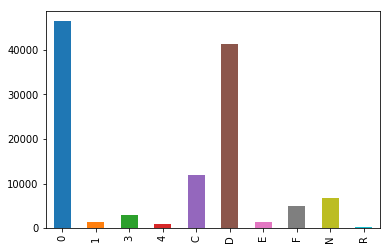

In [13]:
demodf['lunch_status'].value_counts().sort_index().plot(kind='bar')

In [14]:
newdf = demodf.copy()
newdf.loc[newdf['lunch_status']== 'N',['lunch_status']] = 'Other'
newdf

,grade,lunch_status,ethnicity,race_i,race_a,race_b,race_p,race_w,race_m,sex
student_id,,,,,,,,,,
379984,11,C,N,N,N,Y,N,N,N,F
380519,10,C,Y,N,N,N,N,Y,N,F
380668,10,Other,N,N,N,Y,N,N,N,F
380703,10,C,N,N,N,N,N,Y,N,M
380846,10,C,N,N,N,N,N,Y,N,M
381165,10,Other,Y,N,N,N,N,Y,N,F
381332,10,Other,N,N,N,N,N,Y,N,F
381495,10,Other,N,N,N,N,N,Y,N,F
381500,10,C,N,N,N,Y,N,N,N,M


In [15]:
newdf.loc[newdf['lunch_status']== '0',['lunch_status']] = 'Other'
newdf.loc[newdf['lunch_status']== '1',['lunch_status']] = 'Other'
newdf.loc[newdf['lunch_status']== '4',['lunch_status']] = 'Other'
newdf.loc[newdf['lunch_status']== 'R',['lunch_status']] = 'Reduced'
newdf.loc[newdf['lunch_status']== 'E',['lunch_status']] = 'Reduced'
newdf.loc[newdf['lunch_status']== '3',['lunch_status']] = 'Reduced'
newdf.loc[newdf['lunch_status']== 'C',['lunch_status']] = 'Free'
newdf.loc[newdf['lunch_status']== 'F',['lunch_status']] = 'Free'
newdf.loc[newdf['lunch_status']== 'D',['lunch_status']] = 'Free'
newdf

,grade,lunch_status,ethnicity,race_i,race_a,race_b,race_p,race_w,race_m,sex
student_id,,,,,,,,,,
379984,11,Free,N,N,N,Y,N,N,N,F
380519,10,Free,Y,N,N,N,N,Y,N,F
380668,10,Other,N,N,N,Y,N,N,N,F
380703,10,Free,N,N,N,N,N,Y,N,M
380846,10,Free,N,N,N,N,N,Y,N,M
381165,10,Other,Y,N,N,N,N,Y,N,F
381332,10,Other,N,N,N,N,N,Y,N,F
381495,10,Other,N,N,N,N,N,Y,N,F
381500,10,Free,N,N,N,Y,N,N,N,M


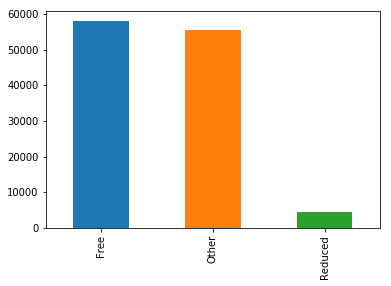

In [16]:
newdf['lunch_status'].value_counts().sort_index().plot(kind='bar')

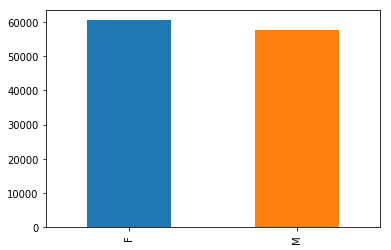

In [17]:
newdf['sex'].value_counts().sort_index().plot(kind='bar')

In [22]:
hispanic = newdf['ethnicity'].value_counts()['Y']
native_american = newdf['race_i'].value_counts()['Y']
asian = newdf['race_a'].value_counts()['Y']
black = newdf['race_b'].value_counts()['Y']
white = newdf['race_w'].value_counts()['Y']
pacific_islander = newdf['race_p'].value_counts()['Y']
mixed = newdf['race_m'].value_counts()['Y']

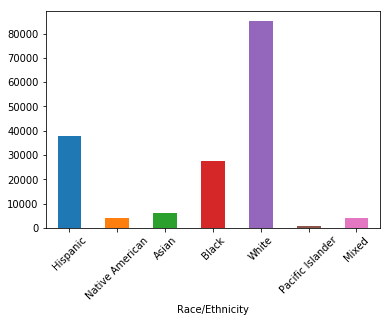

In [25]:
x = pd.DataFrame({'Race/Ethnicity':['Hispanic','Native American','Asian','Black','White','Pacific Islander',
                                   'Mixed'],'Count':[hispanic,native_american,asian,black,white,pacific_islander,mixed]})
x.plot.bar(x='Race/Ethnicity',y='Count',legend=False,rot=45)

Get demographic data for the usage clusters

In [5]:
from sklearn.externals import joblib
allActivity = '../Data (Algebra 1)/Processed Usage Features.csv'
demoActivity = '../Data (Algebra 1)/YearUsageFilterDemographics.csv'
alldf = readData(allActivity)
filterind = readData(demoActivity).index
activitydf = filterByIndex(alldf,filterind)
model = joblib.load('kmeans.joblib')
clusterSeries = pd.Series(model.predict(activitydf.values),index=activitydf.index)

c:\program files (x86)\python36-32\lib\site-packages\sklearn\base.py:251: UserWarning: Trying to unpickle estimator KMeans from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
demofile = '../Data (Algebra 1)/YearDemographicsTest.csv'
demodf = readData(demofile)

In [9]:
len(demodf)

118177

In [38]:
ind = clusterSeries.loc[clusterSeries == 1].index
cluster = filterByIndex(demodf, ind)
print(cluster.mean(axis=0))

Grade 6             0.000667
Grade 7             0.092718
Grade 8             0.351241
Grade 9             0.446959
Grade 10            0.096351
Grade 11            0.009532
Grade 12            0.002533
Free Lunch          0.526079
Reduced Lunch       0.038027
Other Lunch         0.435894
Hispanic            0.306616
Native American     0.033928
Asian               0.042526
Black               0.244626
Pacific Islander    0.008465
White               0.720447
Mixed               0.034894
Female              0.463856
dtype: float64


In [43]:
data = np.zeros((18,5))
for i in range(5):
    ind = clusterSeries.loc[clusterSeries == i].index
    cluster = filterByIndex(demodf,ind)
    data[:,i] = cluster.mean(axis=0).values
compiled = pd.DataFrame(data=data,index=list(cluster))
compiled

,0,1,2,3,4
Grade 6,0.000932,0.000667,0.000823,0.000804,0.001949
Grade 7,0.098778,0.092718,0.125540,0.106262,0.177555
Grade 8,0.323302,0.351241,0.350689,0.459522,0.484949
Grade 9,0.442855,0.446959,0.424367,0.361463,0.273130
Grade 10,0.116647,0.096351,0.089730,0.065784,0.057412
Grade 11,0.012882,0.009532,0.006689,0.004664,0.003994
Grade 12,0.004605,0.002533,0.002161,0.001501,0.001011
Free Lunch,0.536809,0.526079,0.516258,0.476517,0.446883
Reduced Lunch,0.034260,0.038027,0.040029,0.041551,0.037080
Other Lunch,0.428932,0.435894,0.443713,0.481932,0.516037


In [44]:
compiled['Mean'] = compiled.mean(axis=1)

In [46]:
compiled.round(2).T

,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Free Lunch,Reduced Lunch,Other Lunch,Hispanic,Native American,Asian,Black,Pacific Islander,White,Mixed,Female
0,0.0,0.10,0.32,0.44,0.12,0.01,0.0,0.54,0.03,0.43,0.32,0.03,0.04,0.27,0.01,0.70,0.03,0.47
1,0.0,0.09,0.35,0.45,0.10,0.01,0.0,0.53,0.04,0.44,0.31,0.03,0.04,0.24,0.01,0.72,0.03,0.46
2,0.0,0.13,0.35,0.42,0.09,0.01,0.0,0.52,0.04,0.44,0.37,0.04,0.04,0.24,0.01,0.71,0.03,0.57
3,0.0,0.11,0.46,0.36,0.07,0.00,0.0,0.48,0.04,0.48,0.34,0.04,0.05,0.20,0.01,0.75,0.03,0.56
4,0.0,0.18,0.48,0.27,0.06,0.00,0.0,0.45,0.04,0.52,0.31,0.03,0.07,0.22,0.01,0.72,0.03,0.53
Mean,0.0,0.12,0.39,0.39,0.09,0.01,0.0,0.50,0.04,0.46,0.33,0.03,0.05,0.23,0.01,0.72,0.03,0.52


## Clustering just demographics

Explore silhouette scores for k-means clustering

In [48]:
data = getSample(demodf,4000).values
silhouetteSummary(range(2,41),data)

For 2 clusters, average silhouette score is 0.2434943197641719
For 3 clusters, average silhouette score is 0.2570601197824823
For 4 clusters, average silhouette score is 0.2640588021587017
For 5 clusters, average silhouette score is 0.2794256727025441
For 6 clusters, average silhouette score is 0.3193467983865721
For 7 clusters, average silhouette score is 0.3170231381398433
For 8 clusters, average silhouette score is 0.3149266739990287
For 9 clusters, average silhouette score is 0.34543383584360926
For 10 clusters, average silhouette score is 0.36463511295741985
For 11 clusters, average silhouette score is 0.3457437476462665
For 12 clusters, average silhouette score is 0.3707248021114465
For 13 clusters, average silhouette score is 0.3907847642229018
For 14 clusters, average silhouette score is 0.387126355238622
For 15 clusters, average silhouette score is 0.4084973485564396
For 16 clusters, average silhouette score is 0.42286365904821577
For 17 clusters, average silhouette score is 0

Seems like cluster strength gets better with more clusters, but 40 clusters doesn't seem useful.

Look at results of hierarchical clustering.

In [49]:
method = 'ward'
small_data = getSample(demodf,1000)
wardClusters = linkage(small_data,method=method)

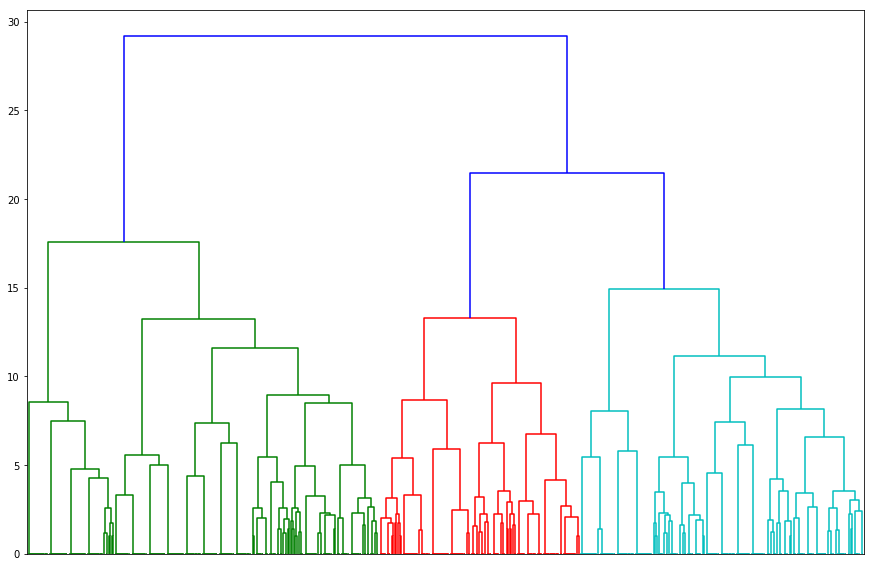

In [50]:
plt.figure(figsize=(15,10))
_ = dendrogram(wardClusters,no_labels=True,p=15,truncate_mode='level')

Truncate at the 7-cluster level

In [51]:
wardLabels = fcluster(wardClusters, 7, criterion='maxclust')
wardLabels = wardLabels - 1
wardLabelCounts = countLabels(wardLabels)

,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Free Lunch,Reduced Lunch,Other Lunch,Hispanic,Native American,Asian,Black,Pacific Islander,White,Mixed,Female,Proportions
0,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.30,0.00,0.00,0.00,0.00,1.00,0.00,0.47,0.18
1,0.00,0.06,0.04,0.75,0.12,0.01,0.00,0.04,0.00,0.96,0.24,0.02,0.13,0.20,0.01,0.71,0.04,0.51,0.07
2,0.01,0.09,0.00,0.66,0.21,0.02,0.02,1.00,0.00,0.00,0.05,0.01,0.00,0.99,0.00,0.00,0.00,0.52,0.20
3,0.00,0.01,0.92,0.05,0.02,0.00,0.00,0.61,0.02,0.37,0.07,0.02,0.13,0.87,0.01,0.36,0.36,0.48,0.11
4,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.52,0.00,0.01,0.00,0.00,1.00,0.00,0.47,0.08
5,0.01,0.13,0.09,0.66,0.10,0.01,0.00,0.83,0.15,0.02,0.61,0.09,0.00,0.00,0.01,0.90,0.00,0.49,0.13
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22


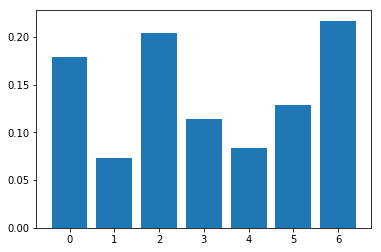

In [53]:
wardReps = np.zeros((len(wardLabelCounts),18))
for key in range(max(wardLabels)):
    clusterCore = small_data[wardLabels == key + 1]
    clusterMean = np.mean(clusterCore, axis=0)
    wardReps[key,:] = clusterMean
displayClusters(wardLabels,wardReps,list(demodf))

Try k-means clustering with k=7

,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,Grade 11,Grade 12,Free Lunch,Reduced Lunch,Other Lunch,Hispanic,Native American,Asian,Black,Pacific Islander,White,Mixed,Female,Proportions
0,0.0,-0.00,-0.00,0.00,1.00,0.00,0.00,0.47,0.05,0.48,0.41,0.05,0.03,0.20,0.01,0.76,0.04,0.47,0.05
1,0.0,0.00,1.00,-0.00,-0.00,0.00,0.00,0.91,0.09,0.00,0.52,0.06,0.06,0.03,0.01,0.90,0.04,0.51,0.15
2,0.0,0.08,0.29,0.44,0.17,0.02,0.01,0.97,0.03,0.01,0.04,0.00,0.01,1.00,0.00,0.03,0.04,0.53,0.16
3,0.0,0.00,0.99,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.21,0.02,0.07,0.09,0.01,0.87,0.04,0.53,0.22
4,0.0,0.00,0.00,0.99,-0.00,0.01,0.00,-0.00,0.04,0.96,0.27,0.03,0.04,0.16,0.01,0.81,0.03,0.51,0.16
5,0.0,1.00,-0.00,0.00,0.00,0.00,0.00,0.16,0.04,0.80,0.18,0.01,0.16,0.06,0.01,0.80,0.04,0.50,0.10
6,0.0,0.11,0.00,0.87,-0.00,0.01,0.00,0.97,0.03,0.00,0.67,0.07,0.03,0.01,0.01,0.91,0.01,0.50,0.16


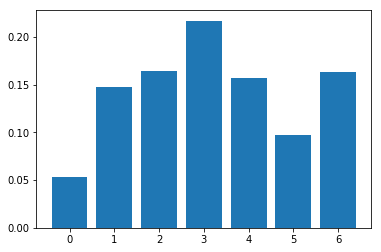

In [8]:
kmeans = KMeans(n_clusters=7)
kmeansLabels, kmeans = cluster(kmeans, demodf)
kmeansReps = kmeans.cluster_centers_
displayClusters(kmeansLabels, kmeansReps,list(demodf))

In [11]:
joblib.dump(kmeans,'kmeans demo only.joblib')

['kmeans demo only.joblib']

## Clustering demographics and usage

In [6]:
combinedfeatures = activitydf.join(demodf)

Explore silhouette scores for k-means clustering

In [7]:
data = getSample(combinedfeatures,4000).values
silhouetteSummary(range(2,41),data)

For 2 clusters, average silhouette score is 0.2039148136421323
For 3 clusters, average silhouette score is 0.2087956527241662
For 4 clusters, average silhouette score is 0.20167123766515838
For 5 clusters, average silhouette score is 0.2002127424429926
For 6 clusters, average silhouette score is 0.2264181970261885
For 7 clusters, average silhouette score is 0.23900712915545483
For 8 clusters, average silhouette score is 0.21130086978250903
For 9 clusters, average silhouette score is 0.2251293234899178
For 10 clusters, average silhouette score is 0.22993234640176363
For 11 clusters, average silhouette score is 0.23155729496423658
For 12 clusters, average silhouette score is 0.2355024321559897
For 13 clusters, average silhouette score is 0.233951681456567
For 14 clusters, average silhouette score is 0.22887027799119902
For 15 clusters, average silhouette score is 0.22764847953161751
For 16 clusters, average silhouette score is 0.23382501241611822
For 17 clusters, average silhouette score

In general, clustering scores look very low.

Look at results of hierarchical clustering.

In [20]:
method = 'ward'
small_data = getSample(combinedfeatures,1000)
wardClusters = linkage(small_data,method=method)

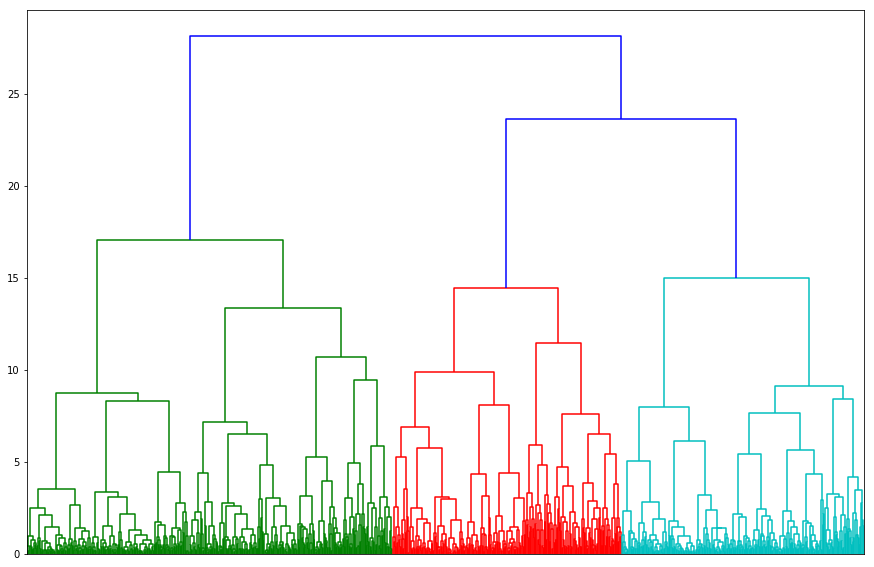

In [21]:
plt.figure(figsize=(15,10))
_ = dendrogram(wardClusters,no_labels=True,p=15,truncate_mode='level')

Try k-means clustering with k=7

,desktop,spring,hour,sessionTime,NumSessions,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,...,Other Lunch,Hispanic,Native American,Asian,Black,Pacific Islander,White,Mixed,Female,Proportions
0,0.79,0.67,0.61,0.32,0.21,0.01,0.10,0.29,0.41,0.18,...,0.91,0.11,0.02,0.03,0.97,0.01,0.02,0.03,0.54,0.06
1,0.78,0.67,0.61,0.31,0.15,0.00,0.10,0.00,0.75,0.13,...,0.00,0.67,0.07,0.01,0.01,0.01,0.93,0.01,0.49,0.18
2,0.77,0.73,0.62,0.34,0.26,0.00,0.00,1.00,-0.00,-0.00,...,0.96,0.21,0.02,0.07,0.02,0.01,0.93,0.04,0.53,0.21
3,0.78,0.70,0.61,0.30,0.16,0.00,0.00,0.00,1.00,-0.00,...,0.95,0.30,0.03,0.05,0.03,0.01,0.94,0.04,0.51,0.13
4,0.77,0.72,0.62,0.33,0.24,0.00,0.00,1.00,-0.00,-0.00,...,0.00,0.55,0.06,0.06,0.03,0.01,0.90,0.04,0.51,0.14
5,0.81,0.67,0.62,0.30,0.20,0.00,0.10,0.27,0.44,0.17,...,0.00,0.04,0.01,0.05,0.95,0.01,0.04,0.04,0.52,0.17
6,0.80,0.70,0.63,0.34,0.26,0.00,0.82,0.00,-0.00,0.16,...,0.84,0.22,0.01,0.11,0.01,0.01,0.90,0.03,0.49,0.11


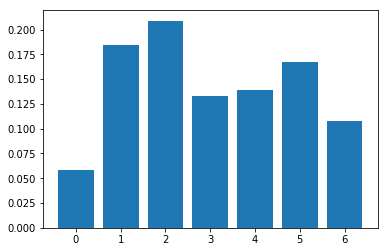

In [8]:
kmeans = KMeans(n_clusters=7)
kmeansLabels, kmeans = cluster(kmeans, combinedfeatures)
kmeansReps = kmeans.cluster_centers_
displayClusters(kmeansLabels, kmeansReps,list(combinedfeatures))

In [23]:
joblib.dump(kmeans,'kmeans demo and usage.joblib')

['kmeans demo and usage.joblib']

In [17]:
model = joblib.load('kmeans demo and usage.joblib')
kmeansReps = model.cluster_centers_
kmeansLabels = model.predict(combinedfeatures.values)
clusterDict = countLabels(kmeansLabels)
factor = 1.0 / sum(clusterDict.values())
for k in clusterDict:
    clusterDict[k] = clusterDict[k] * factor
proportions = pd.DataFrame.from_dict(clusterDict, orient='index', columns=['Proportions']).round(2)
centers = pd.DataFrame(kmeansReps, columns=list(combinedfeatures)).round(2)
centerdf = centers.join(proportions)

In [18]:
centerdf

,desktop,spring,hour,sessionTime,NumSessions,Grade 6,Grade 7,Grade 8,Grade 9,Grade 10,...,Other Lunch,Hispanic,Native American,Asian,Black,Pacific Islander,White,Mixed,Female,Proportions
0,0.77,0.73,0.62,0.34,0.26,0.00,0.00,1.00,-0.0,-0.00,...,0.97,0.22,0.02,0.07,0.03,0.01,0.93,0.04,0.53,0.21
1,0.80,0.65,0.61,0.29,0.16,-0.00,0.00,-0.00,1.0,0.00,...,0.22,0.06,0.01,0.04,0.96,0.01,0.04,0.05,0.52,0.10
2,0.78,0.67,0.61,0.30,0.13,0.00,0.00,0.00,1.0,-0.00,...,0.00,0.64,0.07,0.01,0.01,0.01,0.93,0.01,0.50,0.14
3,0.79,0.68,0.62,0.31,0.23,0.00,0.13,0.55,-0.0,0.29,...,0.17,0.04,0.01,0.09,0.91,0.01,0.05,0.06,0.53,0.13
4,0.80,0.70,0.62,0.34,0.26,0.01,0.79,-0.00,-0.0,0.18,...,0.95,0.24,0.02,0.12,0.07,0.01,0.84,0.04,0.49,0.10
5,0.77,0.70,0.62,0.33,0.22,0.00,0.16,0.69,-0.0,0.13,...,0.00,0.60,0.06,0.01,0.01,0.01,0.95,0.01,0.50,0.19
6,0.78,0.70,0.61,0.30,0.16,-0.00,0.00,0.00,1.0,-0.00,...,0.95,0.30,0.03,0.04,0.02,0.01,0.95,0.03,0.51,0.13
